In [1]:
import pandas as pd
from datetime import datetime
from functools import reduce
import matplotlib.pyplot as plt
import ffn
from yahoo_fin.stock_info import get_data

In [2]:
translate = {
    'BM1': 'BM_Growth', 
    'BM2': 'BM_Neutral', 
    'BM3': 'BM_Value', 
    'Size1': 'Size_Small',
    'Size2': 'Size_Neutral',
    'Size3': 'Size_Big',
    'Mom1': 'Mom_Losers',
    'Mom2': 'Mom_Neutral',
    'Mom3': 'Mom_Winners',
    # 'ILLIQ1': '',
    # 'ILLIQ2': '',
    # 'ILLIQ3': '',
    'Size1_BM1': 'Small_and_Growth',
    'Size1_BM2': 'Small_and_Value',
    'Size2_BM1': 'Big_and_Growth',
    'Size2_BM2': 'Big_and_Value',
    'Size1_Mom1': 'Small_and_Losers',
    'Size1_Mom2': 'Small_and_Winners',
    'Size2_Mom1': 'Big_and_Losers',
    'Size2_Mom2': 'Big_and_Winners',
    # 'Size1_ILLIQ1': '',
    # 'Size1_ILLIQ2': '',
    # 'Size2_ILLIQ1': '',
    # 'Size2_ILLIQ2': ''   
}

In [3]:
df_rf = pd.read_csv("http://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=csv&dataInicial=01/01/2000&dataFinal=31/12/2021", sep=';', decimal=',')
df_rf['valor'] = df_rf['valor']/100
df_rf['data'] = pd.to_datetime(df_rf['data'], format='%d/%m/%Y')
df_rf.rename({'data': 'date', 'valor': 'cdi'}, axis=1, inplace=True)

In [4]:
df_ibov = get_data('^BVSP')[['adjclose']]
df_ibov.rename({'adjclose': 'ibov'}, axis=1, inplace=True)

In [5]:
df_ibov = df_ibov.ffill()

In [6]:
df_ibov["ibov"] = ffn.to_returns(df_ibov["ibov"])
df_ibov = df_ibov.fillna(0)

In [7]:
portfolios = {
    "book-to-market": "BM",
    "size": "Size",
    "momentum": "Mom",
    "illiquidity": "ILLIQ"
}

In [8]:
dfs = []
for portfolio_name, column in portfolios.items():
    df = pd.read_excel(f"http://nefin.com.br/Portfolios/3_portfolios_sorted_by_{portfolio_name}.xls", sheet_name='Value Weighted Returns')
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(['year', 'month', 'day'], axis=1)
    dfs.append(df)

In [9]:
portfolios = {
    "size_and_book-to-market_2x2": "Size_BM",
    "size_and_momentum_2x2": "Size_Mom",
    "size_and_illiquidity_2x2": "Size_ILLIQ",
}

for portfolio_name, column in portfolios.items():
    df = pd.read_excel(f"http://nefin.com.br/Portfolios/4_portfolios_sorted_by_{portfolio_name}.xls", sheet_name='Value Weighted Returns')
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(['year', 'month', 'day'], axis=1)
    dfs.append(df)

In [10]:
dfs_merged = reduce(lambda left, right: pd.merge(left, right, on=['date'], how='left'), dfs)
dfs_merged = dfs_merged.merge(df_rf, on=['date'], how='left')
dfs_merged = dfs_merged.merge(df_ibov, left_on=['date'], right_index=True, how='left')

In [11]:
dfs_merged.columns

Index(['BM1', 'BM2', 'BM3', 'date', 'Size1', 'Size2', 'Size3', 'Mom1', 'Mom2',
       'Mom3', 'ILLIQ1', 'ILLIQ2', 'ILLIQ3', 'Size1_BM1', 'Size1_BM2',
       'Size2_BM1', 'Size2_BM2', 'Size1_Mom1', 'Size1_Mom2', 'Size2_Mom1',
       'Size2_Mom2', 'Size1_ILLIQ1', 'Size1_ILLIQ2', 'Size2_ILLIQ1',
       'Size2_ILLIQ2', 'cdi', 'ibov'],
      dtype='object')

In [12]:
dfs_merged.rename(translate, inplace=True, axis=1)

In [13]:
dfs_merged = dfs_merged.set_index('date')
# dfs_merged = dfs_merged[['Size1_Mom1', 'Size1_Mom2', 'Size2_Mom1', 'Size2_Mom2', 'ibov']]

In [14]:
dfs_merged.drop(['ILLIQ1', 'ILLIQ2', 'ILLIQ3', 'Size1_ILLIQ1', 'Size1_ILLIQ2', 'Size2_ILLIQ1', 'Size2_ILLIQ2'], 
                inplace=True, 
                axis=1)

In [15]:
dfs_merged

,BM_Growth,BM_Neutral,BM_Value,Size_Small,Size_Neutral,Size_Big,Mom_Losers,Mom_Neutral,Mom_Winners,Small_and_Growth,Small_and_Value,Big_and_Growth,Big_and_Value,Small_and_Losers,Small_and_Winners,Big_and_Losers,Big_and_Winners,cdi,ibov
date,,,,,,,,,,,,,,,,,,,
2001-01-02,0.001427,0.000700,0.037291,-0.000162,0.018355,0.005083,0.004847,0.000401,0.017708,-0.007975,0.044449,0.003830,0.010114,0.082983,-0.016373,-0.009103,0.006465,0.000584,0.010879
2001-01-03,0.055808,0.066725,0.078660,0.074672,0.074164,0.059209,0.099477,0.060851,0.046752,0.066427,0.067029,0.054783,0.087270,0.056397,0.091311,0.109203,0.043685,0.000582,0.076110
2001-01-04,0.001473,0.005222,-0.011595,0.006645,0.002998,-0.000972,0.004348,-0.006176,0.005243,0.008654,0.008424,0.003511,-0.014580,0.003387,-0.004557,-0.012101,0.006134,0.000583,0.004579
2001-01-05,-0.008726,-0.016119,-0.016361,-0.011022,-0.005327,-0.014136,-0.018106,-0.014082,-0.011293,-0.001476,-0.003346,-0.012383,-0.018154,0.005765,0.000849,-0.028307,-0.012506,0.000582,-0.015892
2001-01-08,-0.002185,0.008170,0.019588,0.009313,0.013557,0.001840,0.005010,0.006803,0.001468,0.016617,0.005868,-0.000769,0.018203,0.013597,0.000205,0.012236,-0.000062,0.000582,0.009263
2001-01-09,0.018177,0.022723,0.023741,0.023729,0.025217,0.019069,0.024990,0.011366,0.023830,0.025300,0.022113,0.018007,0.026495,0.021407,0.043524,0.023417,0.014822,0.000582,0.024997
2001-01-10,-0.004026,-0.009758,0.007484,0.002234,0.005272,-0.006692,-0.007822,-0.001549,-0.001320,0.006564,-0.000971,-0.005166,-0.003474,0.016974,-0.009486,-0.010775,-0.002135,0.000577,-0.003358
2001-01-11,0.001837,0.014134,0.000583,-0.006131,0.004086,0.006573,0.003527,0.006643,0.009319,0.009704,-0.004796,0.004930,0.008813,0.007132,0.001986,0.008062,0.007104,0.000577,0.006206
2001-01-12,-0.006061,-0.010430,0.001562,-0.007676,-0.002767,-0.007005,-0.006002,-0.010667,-0.001069,0.006927,-0.002620,-0.011278,0.004750,-0.008828,-0.002188,-0.001779,-0.007349,0.000577,-0.010221


In [16]:
dfs_merged.loc[datetime(2001,1,1)] = 0

In [17]:
dfs_merged = dfs_merged.sort_index()

In [18]:
dfs_merged = ffn.to_price_index(dfs_merged)

In [19]:
# dfs_merged.rebase().plot()

In [20]:
# dfs.drop('cdi', axis=1, inplace=True)
stats = dfs_merged.calc_stats()
# stats.display()

C:\Users\vinob\Anaconda3\lib\site-packages\ffn\core.py:2163: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\vinob\Anaconda3\lib\site-packages\ffn\core.py:227: RuntimeWarning: divide by zero encountered in true_divide
  self.calmar = np.divide(self.cagr, np.abs(self.max_drawdown))


In [21]:
# stats.stats

In [22]:
ffn.calc_cagr(dfs_merged['cdi'])

0.11921829166417885

In [23]:
# dfs_merged['cdi']

In [24]:
# ffn.calc_sharpe(pd.DataFrame([.001, .002]*126), rf=.1152, nperiods=252, annualize=True)

In [25]:
# pd.options.display.float_format = '{:.2%}'.format
pd.DataFrame([stats.stats.loc['cagr'], stats.stats.loc['max_drawdown'], stats.stats.loc['daily_vol']]).T

,cagr,max_drawdown,daily_vol
BM_Growth,0.149932,-0.549291,0.239822
BM_Neutral,0.145362,-0.581453,0.278200
BM_Value,0.129729,-0.693619,0.318302
Size_Small,0.151010,-0.674281,0.255537
Size_Neutral,0.141480,-0.516514,0.250200
Size_Big,0.139230,-0.576072,0.259151
Mom_Losers,0.078873,-0.735472,0.290634
Mom_Neutral,0.131015,-0.482216,0.267833
Mom_Winners,0.194000,-0.621109,0.268775
Small_and_Growth,0.112096,-0.657204,0.256082


In [26]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300

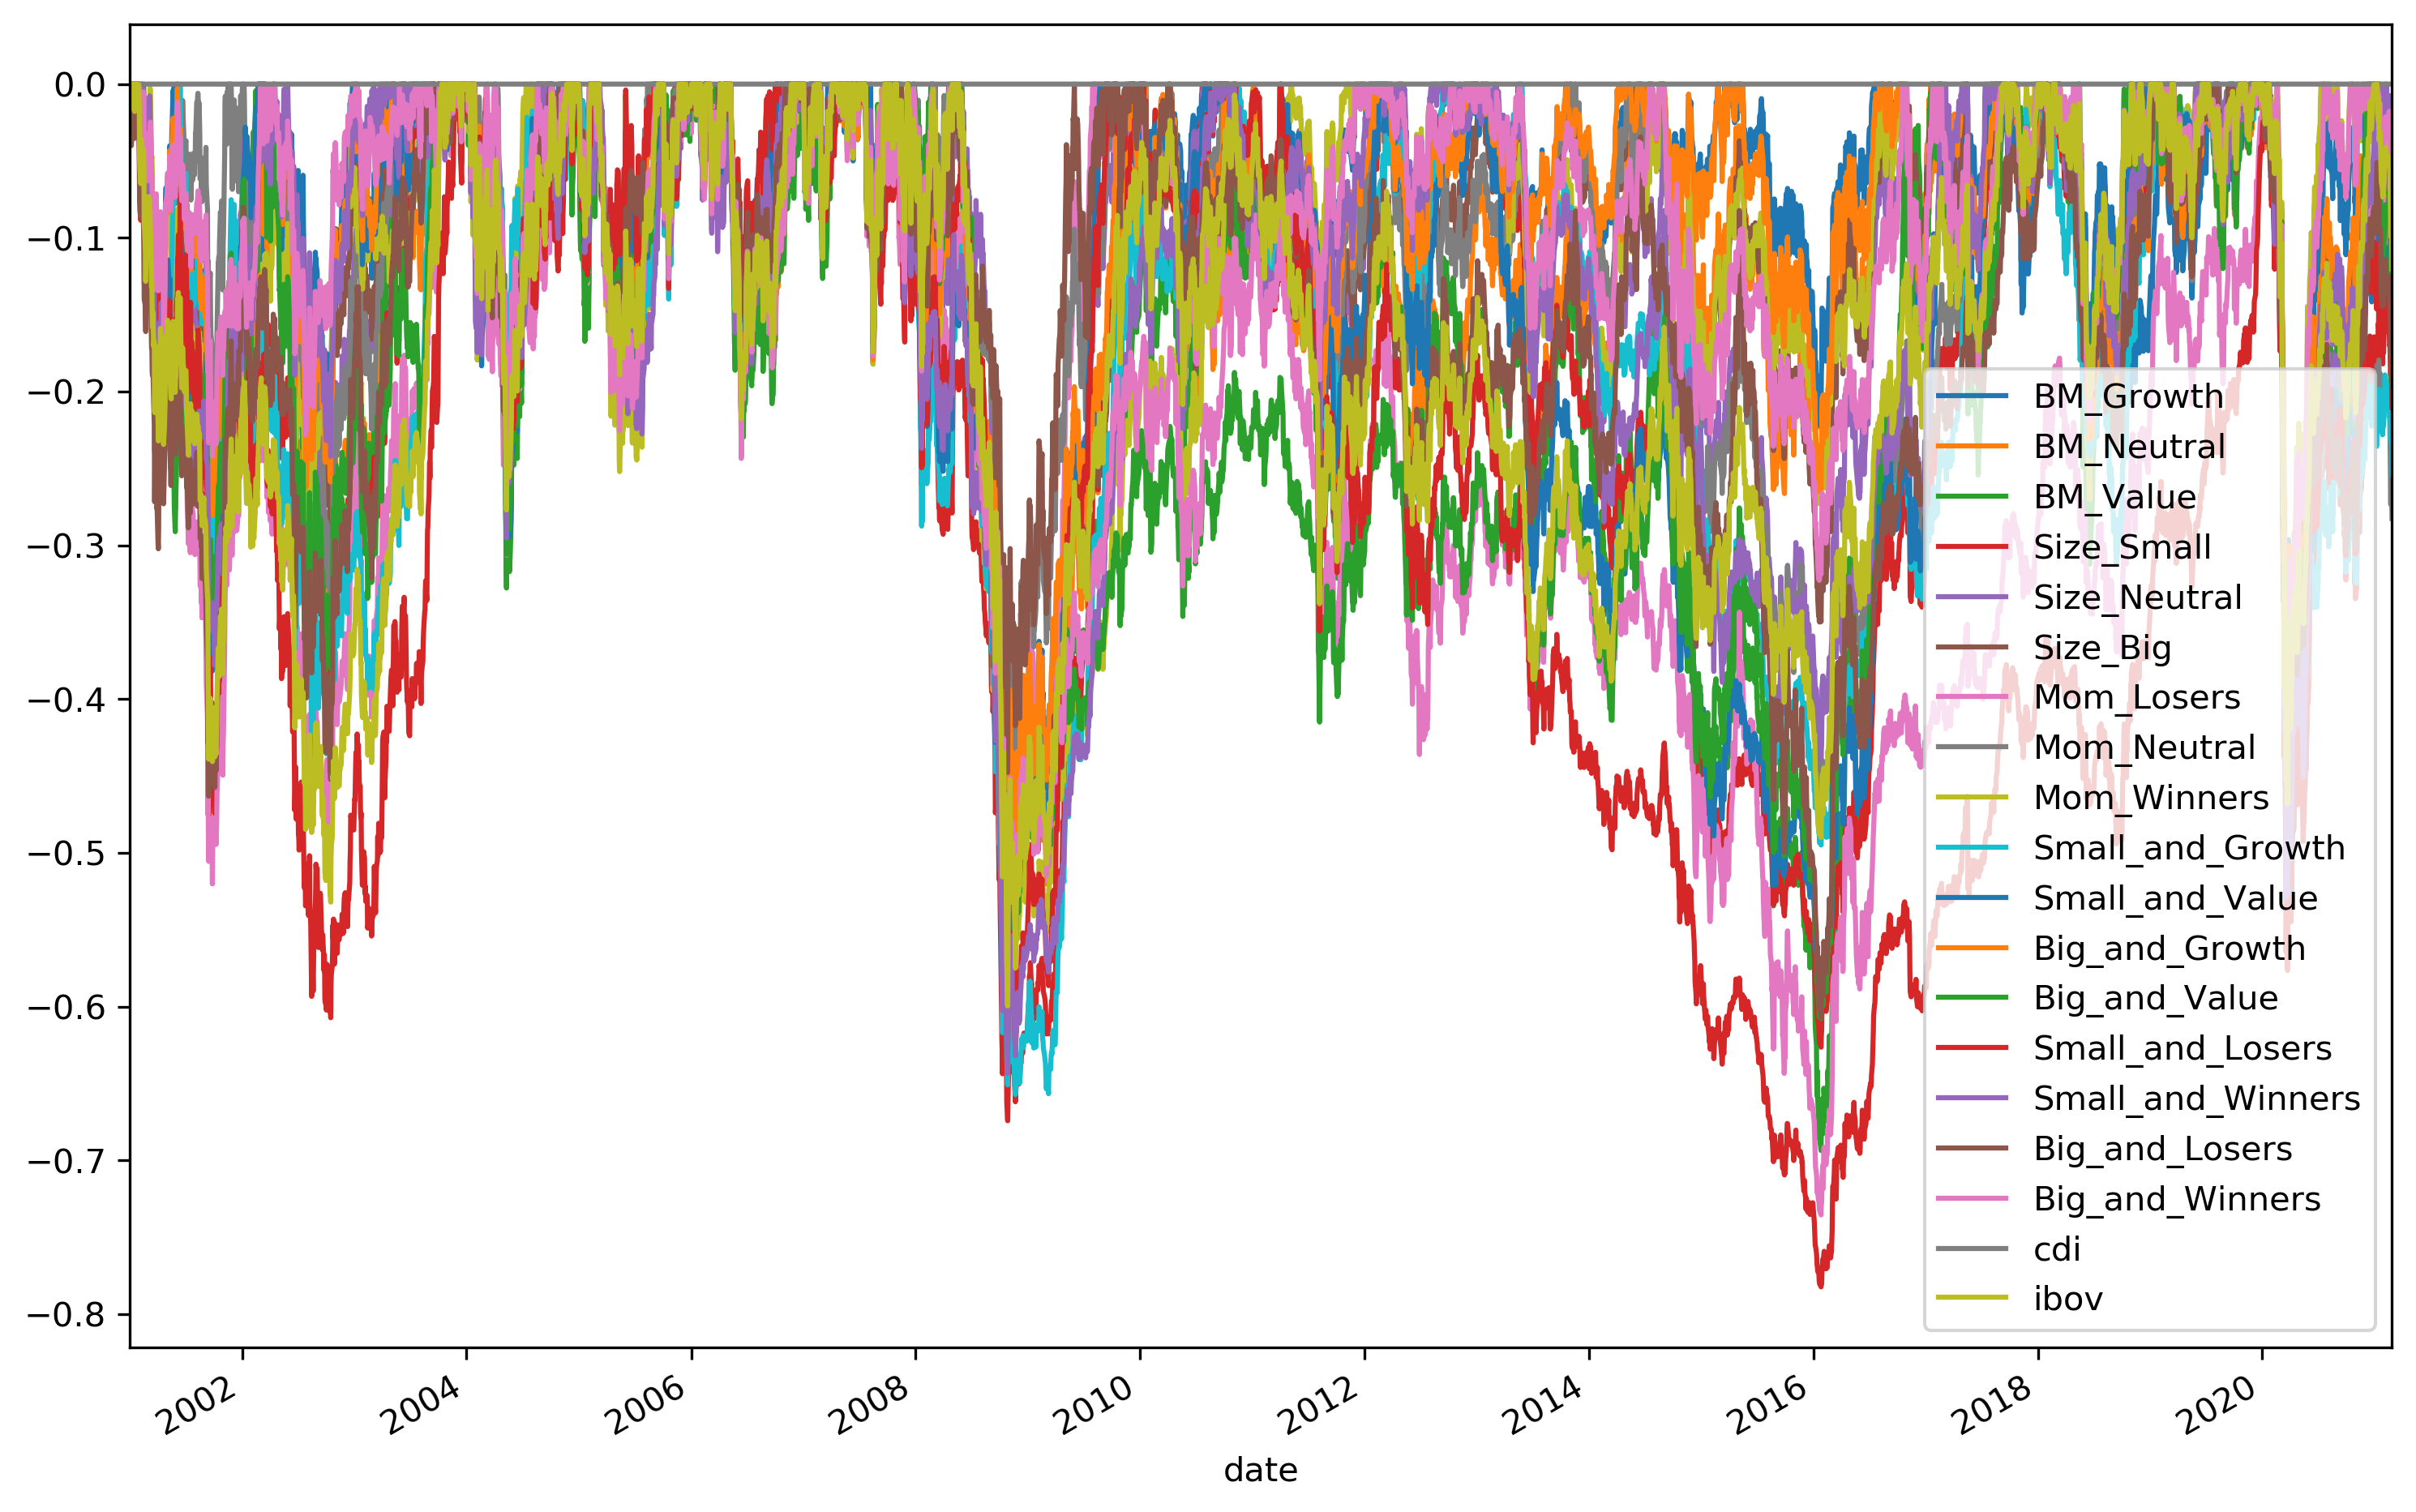

In [27]:
ax = stats.prices.to_drawdown_series().plot()

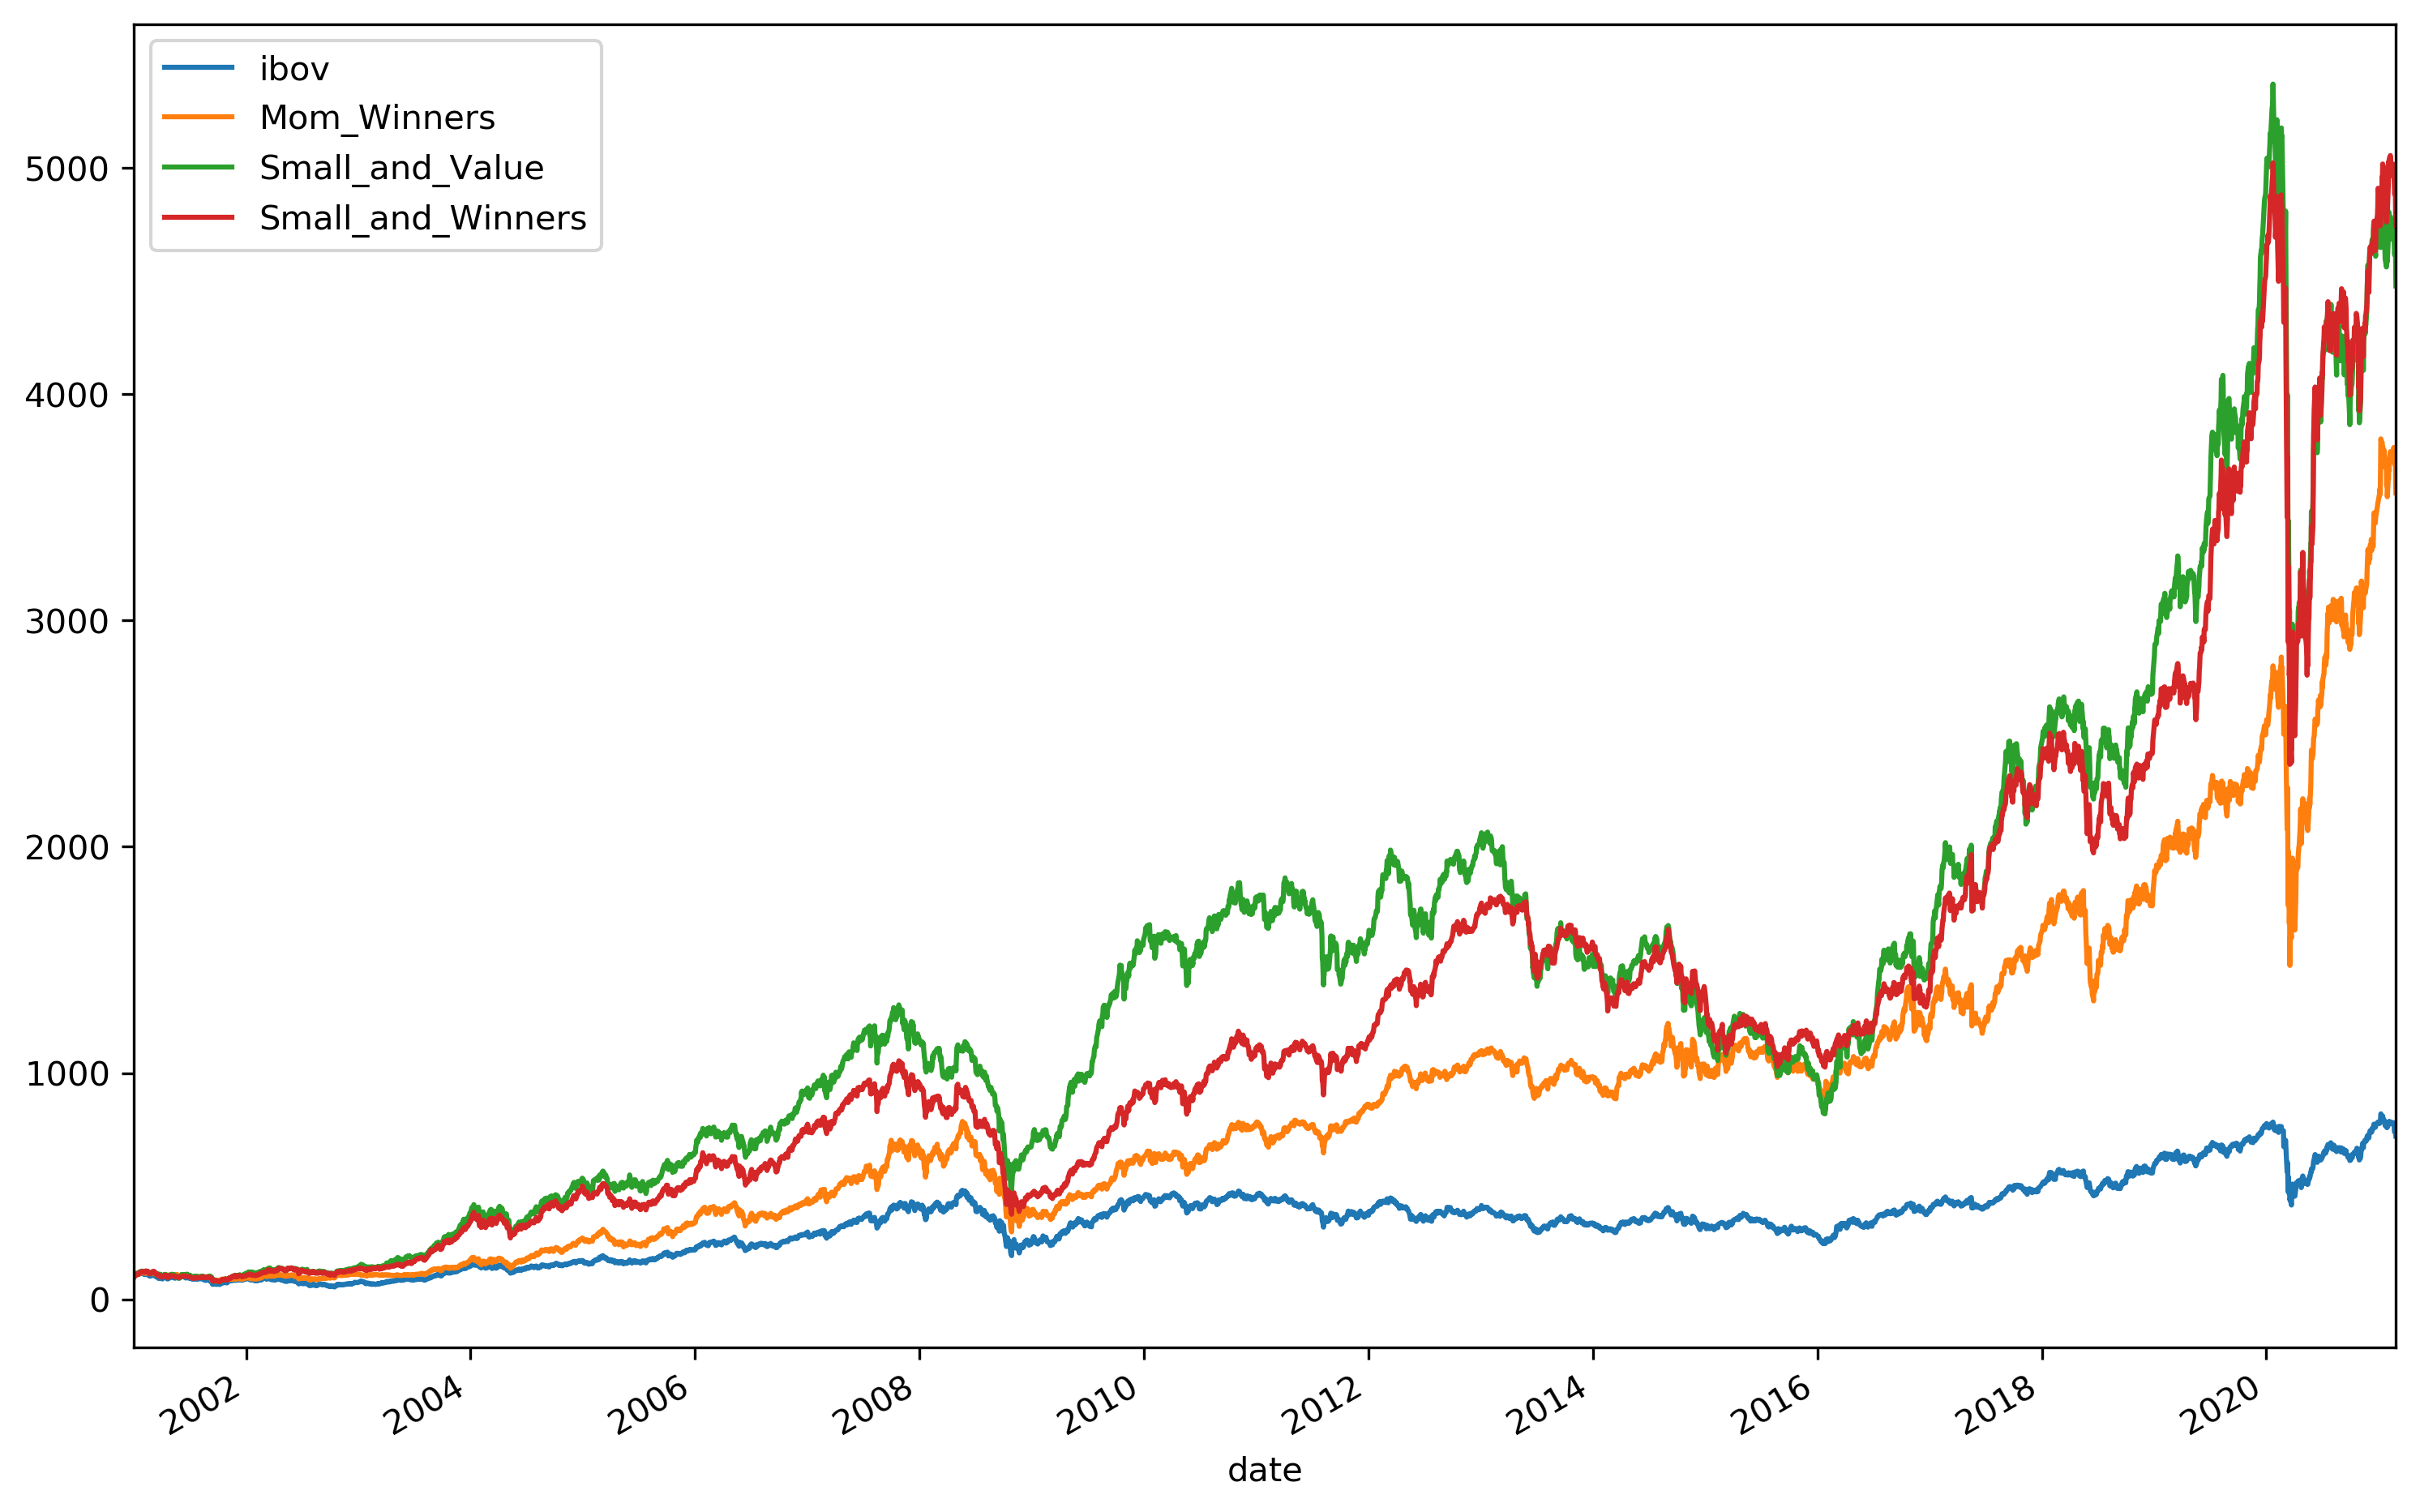

In [76]:
dfs_merged['20010101':].rebase()[['ibov', 'Mom_Winners', 'Small_and_Value', 'Small_and_Winners']].plot()

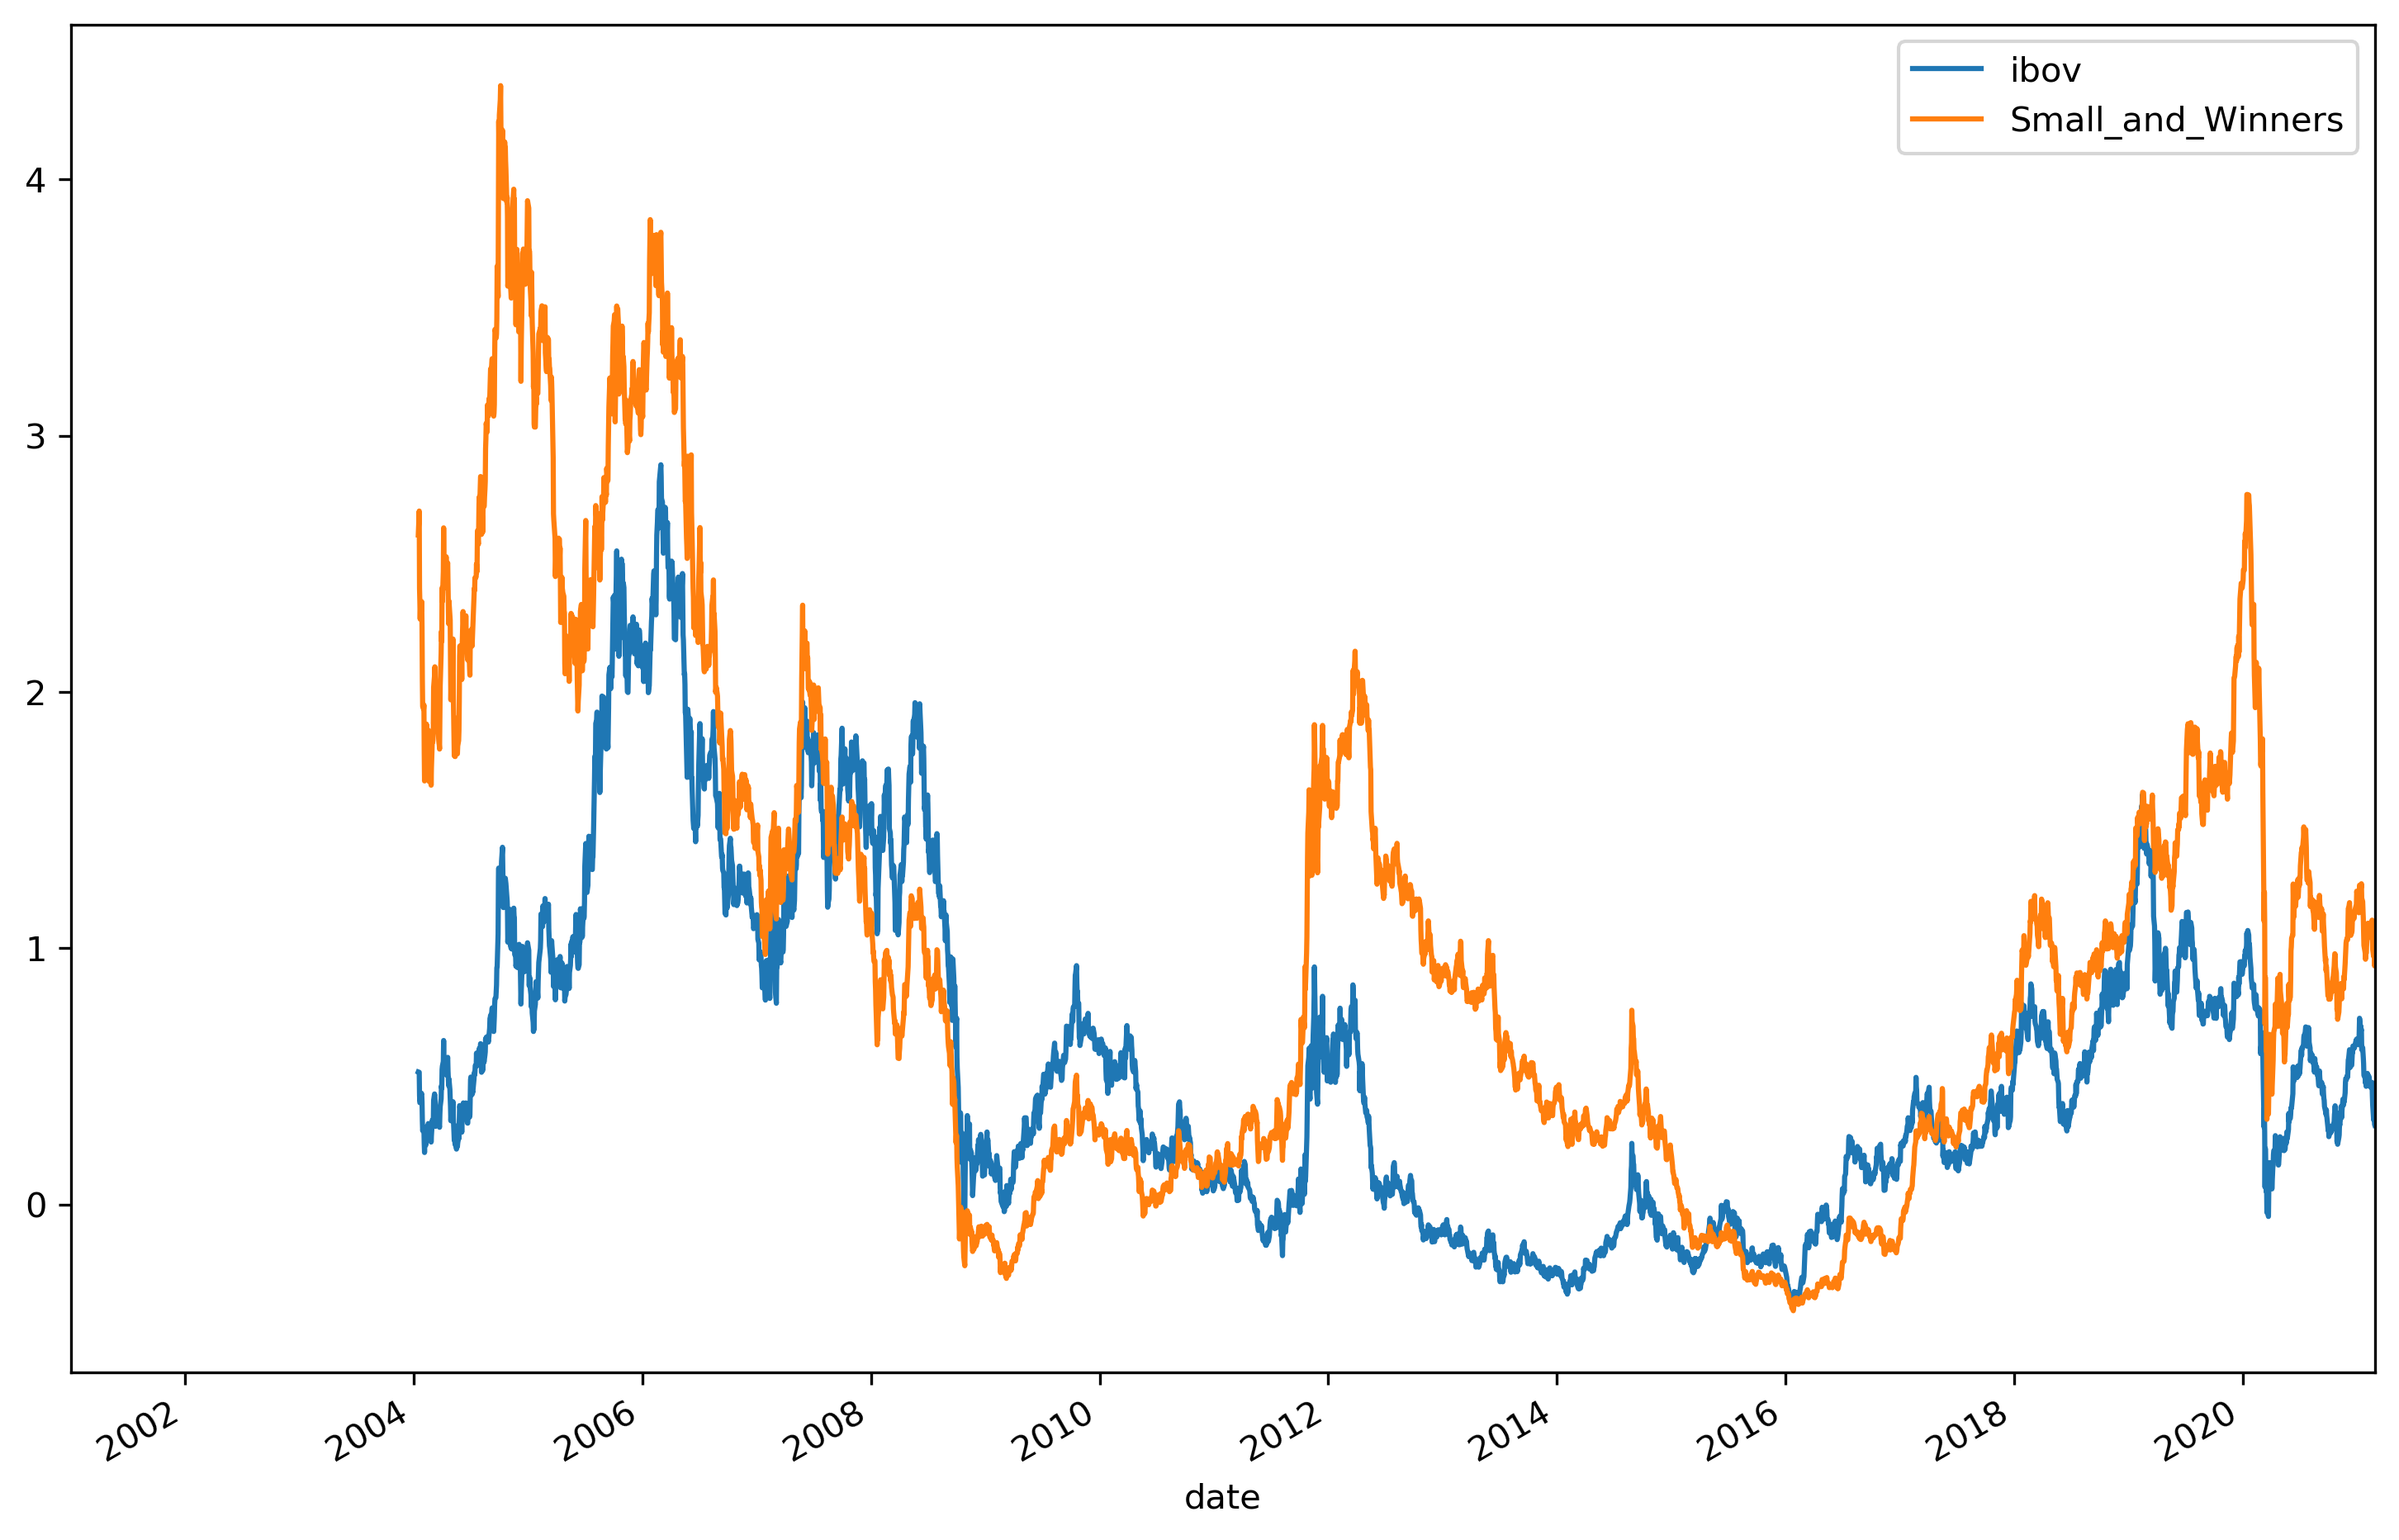

In [39]:
(dfs_merged['ibov'] / dfs_merged['ibov'].shift(252*3) - 1).plot(legend=True) 
(dfs_merged['Small_and_Winners'] / dfs_merged['Small_and_Winners'].shift(252*3) - 1).plot(legend=True)

In [30]:
dfs_merged.columns

Index(['BM_Growth', 'BM_Neutral', 'BM_Value', 'Size_Small', 'Size_Neutral',
       'Size_Big', 'Mom_Losers', 'Mom_Neutral', 'Mom_Winners',
       'Small_and_Growth', 'Small_and_Value', 'Big_and_Growth',
       'Big_and_Value', 'Small_and_Losers', 'Small_and_Winners',
       'Big_and_Losers', 'Big_and_Winners', 'cdi', 'ibov'],
      dtype='object')

In [31]:
cols = ['BM_Growth', 'BM_Neutral', 'BM_Value', 'Size_Small', 'Size_Neutral',
       'Size_Big', 'Mom_Losers', 'Mom_Neutral', 'Mom_Winners',
       'Small_and_Growth', 'Small_and_Value', 'Big_and_Growth',
       'Big_and_Value', 'Small_and_Losers', 'Small_and_Winners',
       'Big_and_Losers', 'Big_and_Winners']
windows = range(1,11)

In [32]:
d = {}
for col in cols:
    d[col] = []
    for i in windows:
        window = i*252
        a = (dfs_merged[col] / dfs_merged[col].shift(window) - 1).dropna() > (dfs_merged['ibov'] / dfs_merged['ibov'].shift(window) - 1).dropna()
        d[col].append(a[a==True].count() / (a[a==True].count() + a[a==False].count()))

In [33]:
consistency = pd.DataFrame(d).T
consistency.columns = [str(year)+"-year" for year in windows]

In [37]:
consistency

,1-year,2-year,3-year,4-year,5-year,6-year,7-year,8-year,9-year,10-year
BM_Growth,61.57%,57.47%,56.36%,56.18%,64.78%,68.38%,78.16%,94.92%,100.00%,100.00%
BM_Neutral,66.28%,71.83%,85.28%,88.22%,93.64%,98.76%,100.00%,100.00%,100.00%,100.00%
BM_Value,54.10%,55.64%,51.25%,46.91%,47.61%,49.31%,51.21%,49.36%,52.28%,51.90%
Size_Small,68.86%,71.07%,63.92%,58.39%,57.73%,77.24%,89.02%,87.92%,83.49%,82.37%
Size_Neutral,59.59%,57.36%,54.91%,53.87%,61.61%,71.12%,68.21%,74.06%,81.18%,99.31%
Size_Big,61.09%,63.85%,77.10%,72.19%,78.86%,88.90%,93.77%,97.41%,100.00%,100.00%
Mom_Losers,36.74%,29.97%,27.95%,32.34%,33.72%,38.49%,31.36%,28.03%,27.10%,17.02%
Mom_Neutral,56.86%,56.45%,66.38%,67.44%,69.10%,76.99%,79.71%,85.36%,91.84%,92.14%
Mom_Winners,70.14%,74.84%,79.40%,85.58%,92.73%,96.17%,95.16%,99.66%,100.00%,100.00%
Small_and_Growth,51.96%,52.63%,48.44%,46.08%,45.92%,50.86%,53.35%,65.28%,80.55%,85.17%


In [36]:
pd.options.display.float_format = '{:.2%}'.format
pd.DataFrame([stats.stats.loc['cagr'], stats.stats.loc['max_drawdown'], stats.stats.loc['daily_vol']]).T.sort_values('cagr', ascending=False)

,cagr,max_drawdown,daily_vol
Small_and_Winners,21.11%,-64.34%,25.48%
Small_and_Value,20.76%,-63.01%,26.49%
Mom_Winners,19.40%,-62.11%,26.88%
Big_and_Winners,17.50%,-59.90%,26.54%
Size_Small,15.10%,-67.43%,25.55%
BM_Growth,14.99%,-54.93%,23.98%
Big_and_Growth,14.94%,-54.97%,24.90%
BM_Neutral,14.54%,-58.15%,27.82%
Size_Neutral,14.15%,-51.65%,25.02%
Size_Big,13.92%,-57.61%,25.92%


In [71]:
import plotly.express as px

fig = px.line(dfs_merged, x=dfs_merged.index, y=cols+['ibov'])
fig.update_layout(legend_title_text='Estratégia', title="Fatores Long-Only na Bolsa Brasileira")

default_columns = ["Small_and_Winners", "Small_and_Value", "Mom_Winners", "ibov"]
for graph in fig.data:
    if graph.name not in default_columns:
        graph.visible = 'legendonly'

fig.write_html('carteiras_factor.html', auto_open=True)